In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [24]:
path=Path("../../datasets/facial_descriptors_dataset/")
path

PosixPath('../../datasets/facial_descriptors_dataset')

In [11]:
path_kissing = path/'Kissing'
path_kicking = path/'Kicking'
path_dining = path/'Dining'
path_boxing_punching = path/'Boxing-Punching'
path_speech = path/'Speech'

In [26]:
path.ls()


[PosixPath('../../datasets/facial_descriptors_dataset/Kissing'),
 PosixPath('../../datasets/facial_descriptors_dataset/.ipynb_checkpoints'),
 PosixPath('../../datasets/facial_descriptors_dataset/Kicking'),
 PosixPath('../../datasets/facial_descriptors_dataset/Dining'),
 PosixPath('../../datasets/facial_descriptors_dataset/Boxing-Punching'),
 PosixPath('../../datasets/facial_descriptors_dataset/Speech')]

In [27]:
np.random.seed(42)

In [28]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [29]:
data.classes

['Boxing-Punching', 'Dining', 'Kicking', 'Kissing', 'Speech']

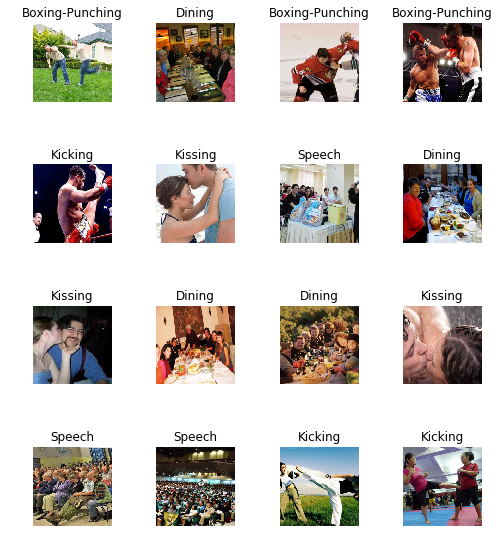

In [30]:
data.show_batch(rows=4, figsize=(7,8))

## Train model RESNET34

In [31]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.497910,0.595451,0.225131,00:11
1,0.928374,0.460089,0.193717,00:08
2,0.697320,0.385324,0.162304,00:08
3,0.577925,0.383252,0.162304,00:08


In [33]:
learn.save('stage-1-34')

## RESULTS

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

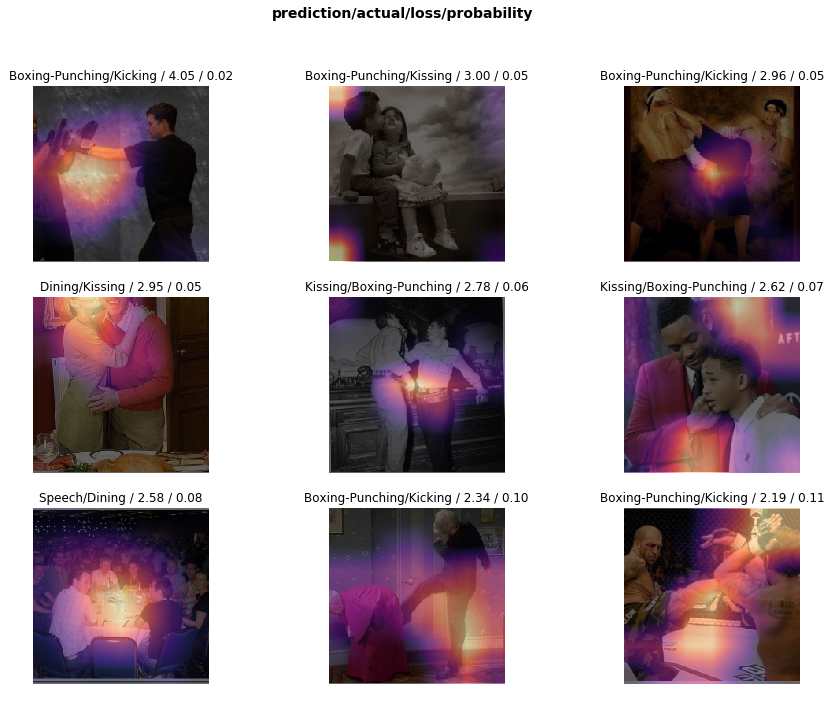

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

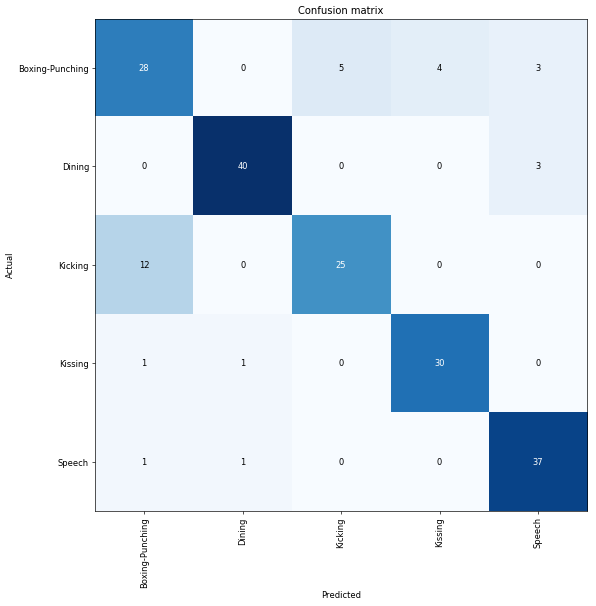

In [36]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [37]:
interp.most_confused(min_val=3)

[('Kicking', 'Boxing-Punching', 12),
 ('Boxing-Punching', 'Kicking', 5),
 ('Boxing-Punching', 'Kissing', 4),
 ('Boxing-Punching', 'Speech', 3),
 ('Dining', 'Speech', 3)]

## Unfreezing, fine-tunning, and learning rates

In [38]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


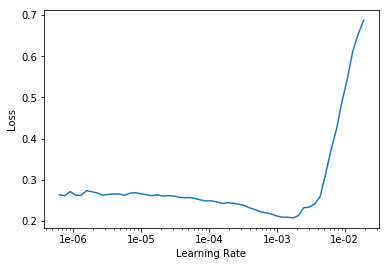

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.250296,0.350946,0.151832,00:08
1,0.246564,0.355291,0.162304,00:09
2,0.221759,0.316201,0.125654,00:08
3,0.194309,0.303647,0.125654,00:08


In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


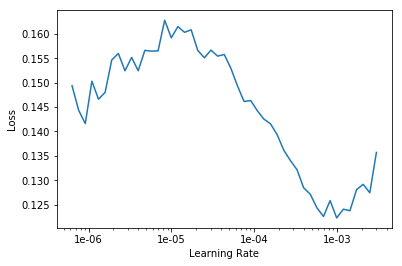

In [43]:
learn.recorder.plot()

In [44]:
learn.save('stage-2-34')

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(4, max_lr=slice(1e-45,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.151474,0.310275,0.130890,00:09
1,0.148514,0.284264,0.120419,00:08
2,0.146489,0.287781,0.115183,00:08
3,0.146495,0.289181,0.109948,00:09


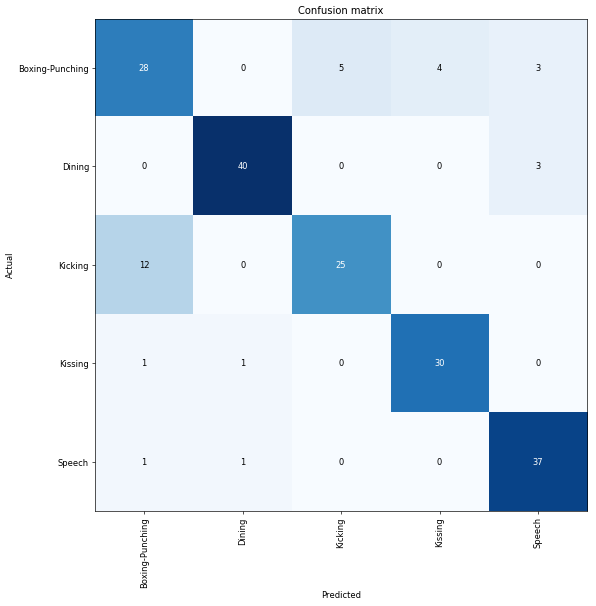

In [47]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [48]:
learn.save('stage-3-34')

## Training: RESNET50

In [49]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=256, num_workers=4).normalize(imagenet_stats)

In [50]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [51]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.134528,0.516834,0.151832,00:11
1,0.673691,0.285943,0.125654,00:10
2,0.503343,0.266680,0.120419,00:10
3,0.398135,0.271153,0.120419,00:10


In [52]:
learn.save('stage-1-50')

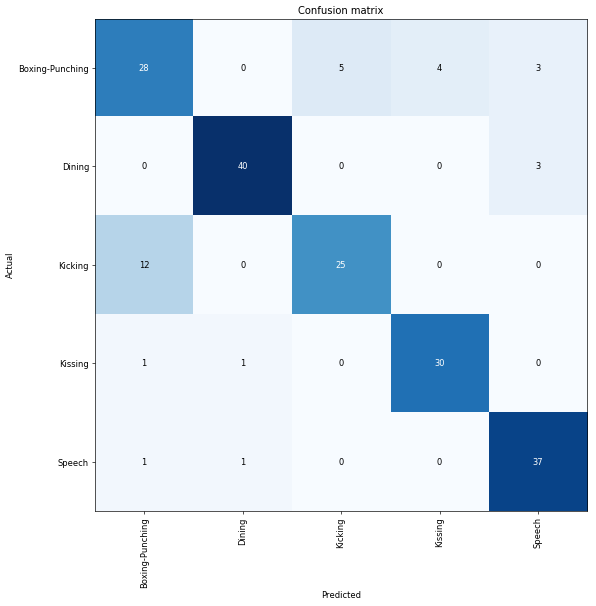

In [53]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


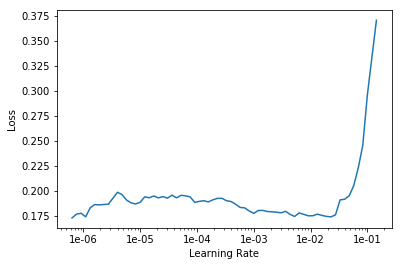

In [55]:
learn.recorder.plot()

In [56]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.261472,0.433255,0.136126,00:09
1,0.291930,0.528017,0.120419,00:10
2,0.257296,0.309304,0.094241,00:10
3,0.197326,0.252424,0.094241,00:10
4,0.151952,0.201844,0.078534,00:10


In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


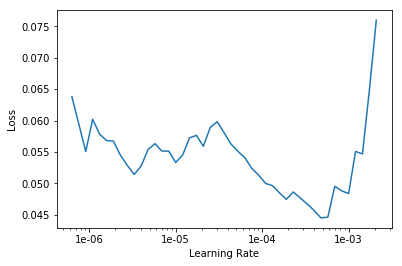

In [59]:
learn.recorder.plot()

In [60]:
learn.save('stage-2-50')

In [61]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(5, max_lr=slice(1e-45,1e-34))

epoch,train_loss,valid_loss,error_rate,time
0,0.042559,0.194171,0.073298,00:10
1,0.051439,0.197033,0.073298,00:10
2,0.052198,0.201042,0.073298,00:10
3,0.053522,0.202883,0.068063,00:10
4,0.059318,0.198542,0.073298,00:10


In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


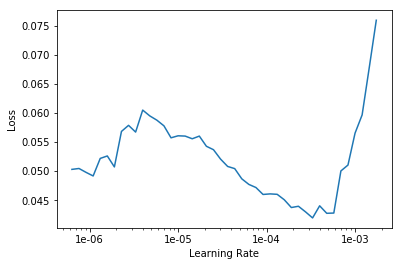

In [64]:
learn.recorder.plot()

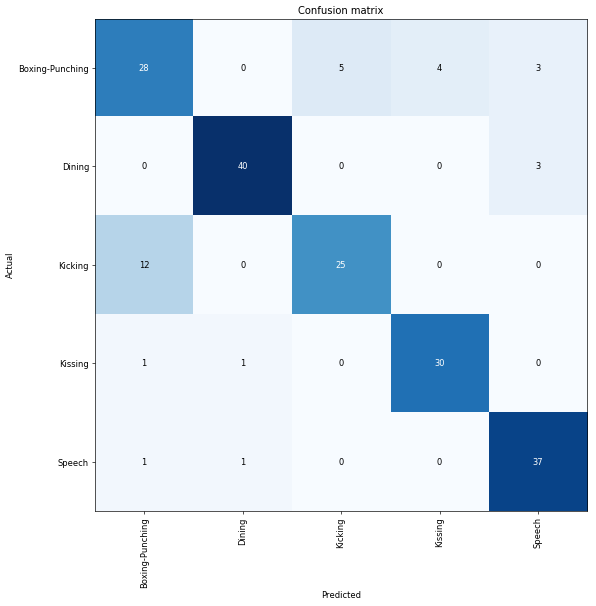

In [65]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [67]:
interp.most_confused(min_val=2)

[('Kicking', 'Boxing-Punching', 12),
 ('Boxing-Punching', 'Kicking', 5),
 ('Boxing-Punching', 'Kissing', 4),
 ('Boxing-Punching', 'Speech', 3),
 ('Dining', 'Speech', 3)]